In [42]:
# Mengimpoert Library yang akan digunakan
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.cluster import DBSCAN
import seaborn as sns

In [43]:
# Membaca dataset
data = pd.read_csv("dataset/video games sales.csv")
data.shape

(16598, 11)

In [44]:
# Menampilkan 5 data teratas
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [45]:
data.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [47]:
data.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [48]:
data.duplicated().sum()

0

In [49]:
# Inisialisasi imputasi
imputer = SimpleImputer(strategy='most_frequent')

# Kolom yang mengandung NaN
data[['Year', 'Publisher']] = imputer.fit_transform(data[['Year', 'Publisher']])

print(data.isnull().sum())


Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64


In [50]:
# Encode kolom kategorikal
categorical_cols = ['Platform', 'Genre', 'Publisher']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le


In [51]:
# Drop kolom tidak relevan
data_clustering = data.drop(columns=['Rank', 'Name'])

In [52]:
# Normalisasi
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_clustering)
data_scaled = pd.DataFrame(data_scaled, columns=data_clustering.columns)


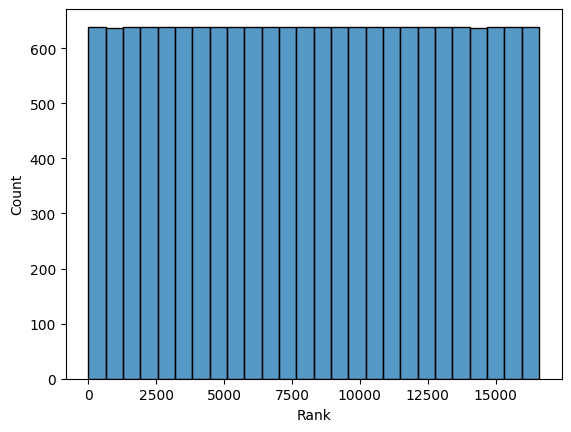

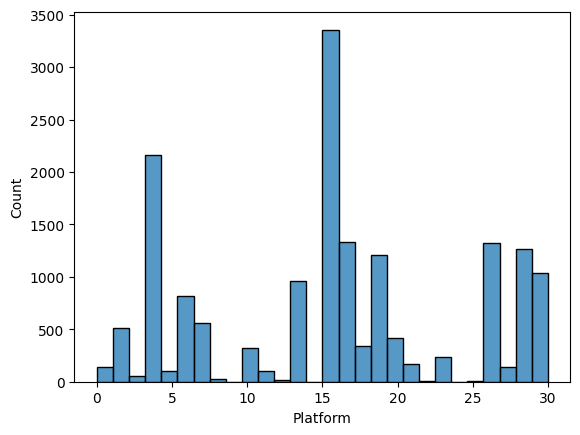

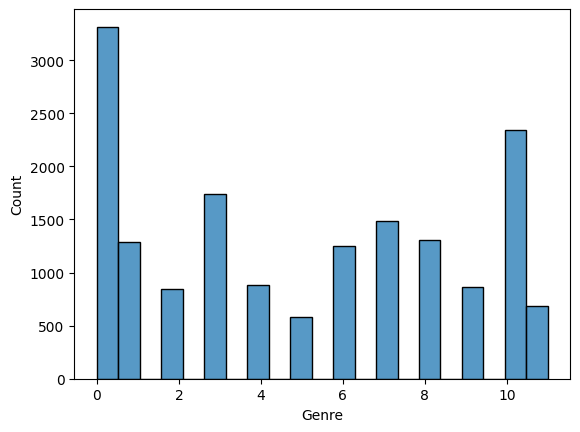

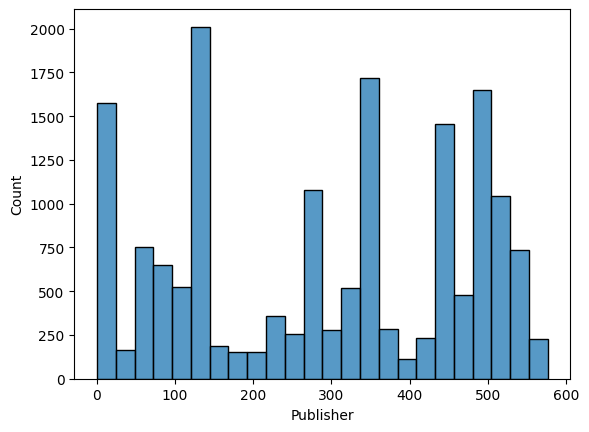

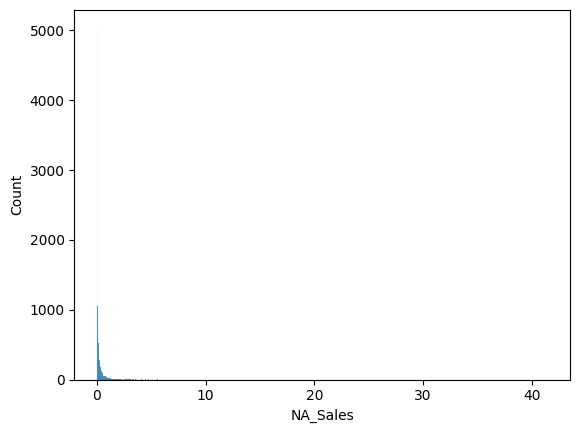

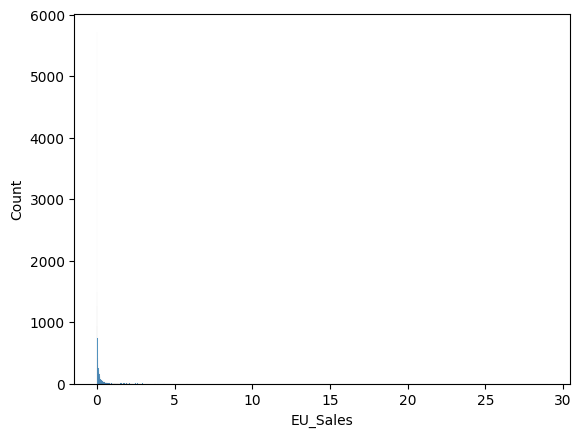

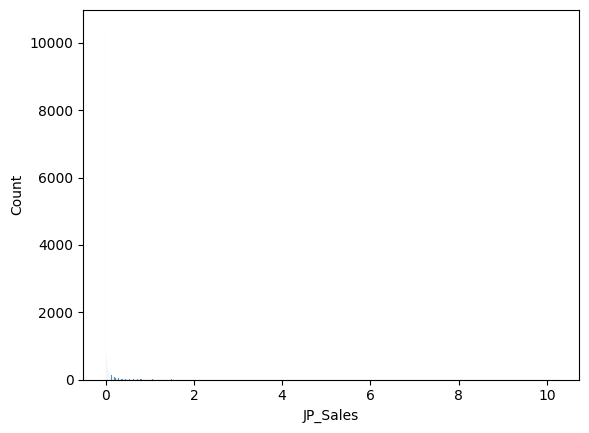

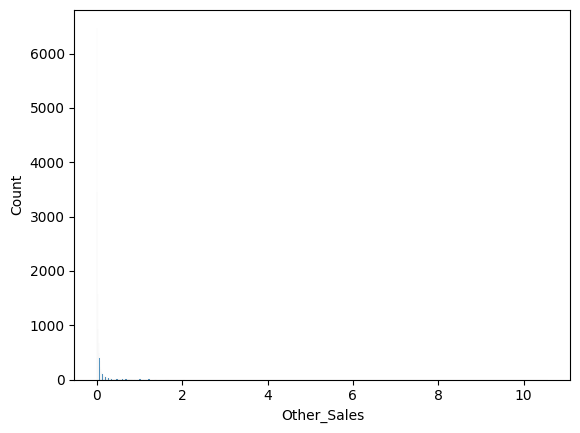

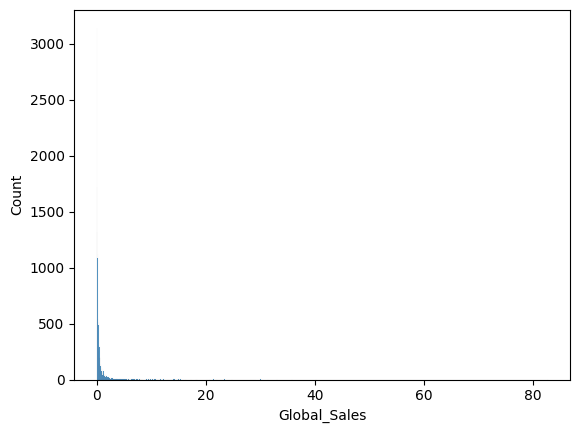

In [53]:
for i in data.select_dtypes(include="number").columns:
    sns.histplot(data=data,x=i)
    plt.show()

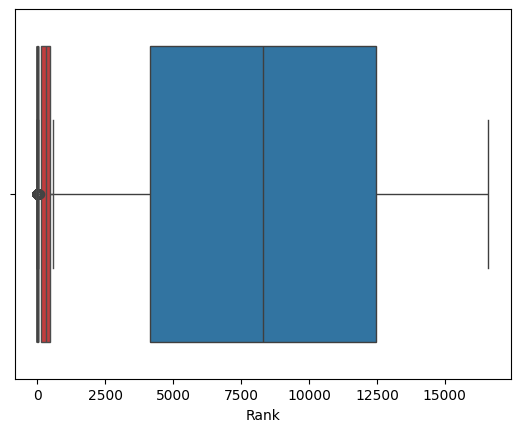

In [54]:
for i in data.select_dtypes(include="number").columns:
    sns.boxplot(data=data, x= i)
    plt.show

In [55]:
inertia = []
silhouette_scores = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, kmeans.labels_))


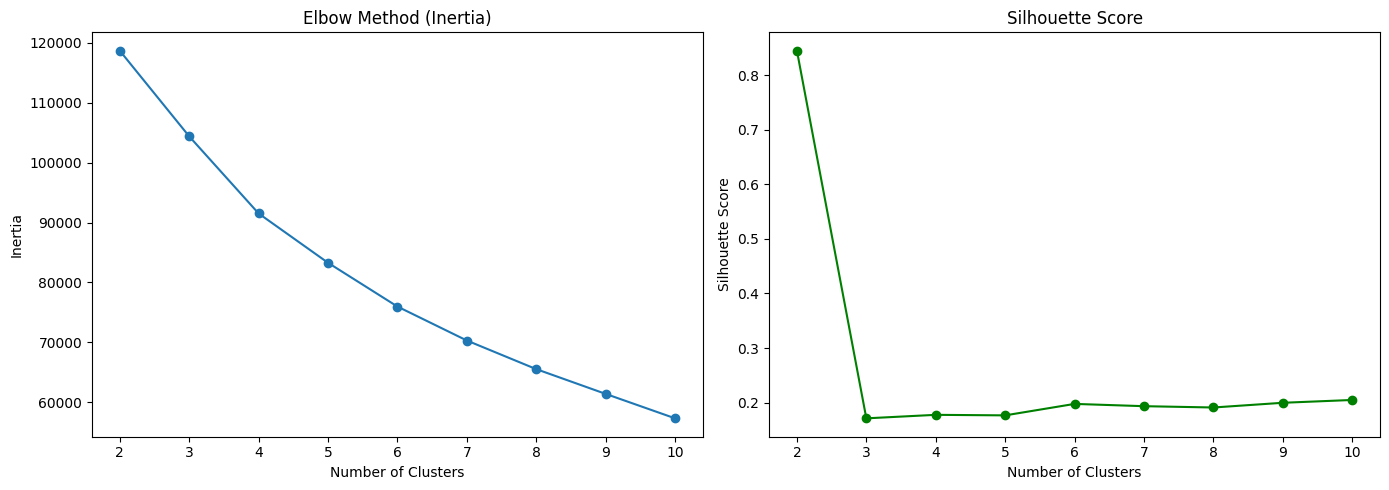

In [56]:
# Visualisasi Elbow Method dan Silhouette Score
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method (Inertia)')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o', color='green')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

In [57]:
# PCA untuk visualisasi
pca = PCA(n_components=2)
X_pca = pca.fit_transform(data_scaled)

results = {}

In [ ]:
# Clustering final dengan k terbaik (misal k=3)
kmeans_final = KMeans(n_clusters=3, random_state=42)
labels_kmeans = kmeans_final.fit_predict(data_scaled)

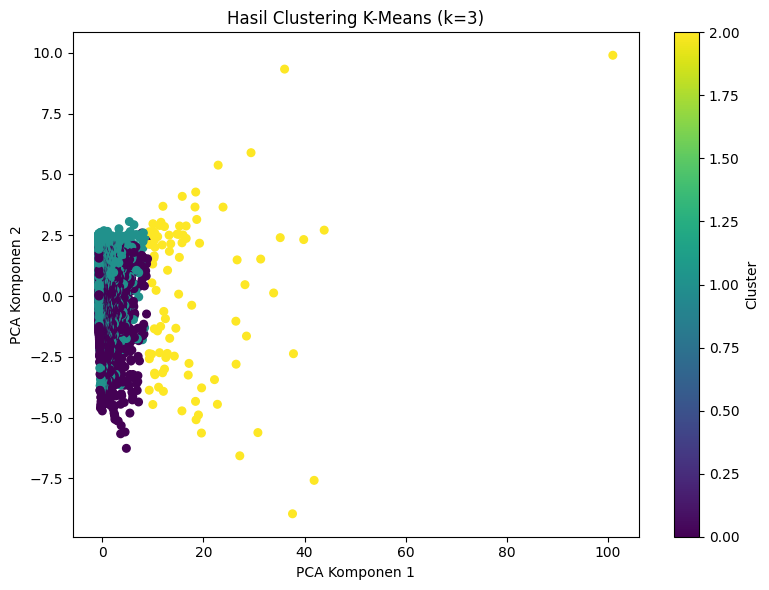

In [59]:
# Visualisasi hasil clustering
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_kmeans, cmap='viridis', s=30)
plt.title("Hasil Clustering K-Means (k=3)")
plt.xlabel("PCA Komponen 1")
plt.ylabel("PCA Komponen 2")
plt.colorbar(label="Cluster")
plt.tight_layout()
plt.show()

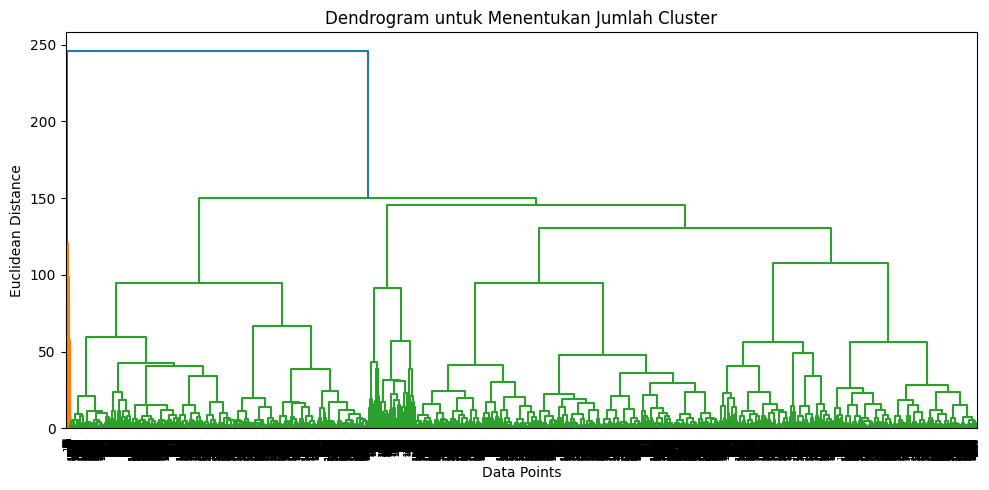

In [60]:
# 2. Plot Dendrogram
plt.figure(figsize=(10, 5))
dendrogram = sch.dendrogram(sch.linkage(data_scaled, method='ward'))
plt.title("Dendrogram untuk Menentukan Jumlah Cluster")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.tight_layout()
plt.show()

In [63]:
# 3. Hierarchical Clustering (misal jumlah cluster = 3)
hc = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
hc_labels = hc.fit_predict(data_scaled)

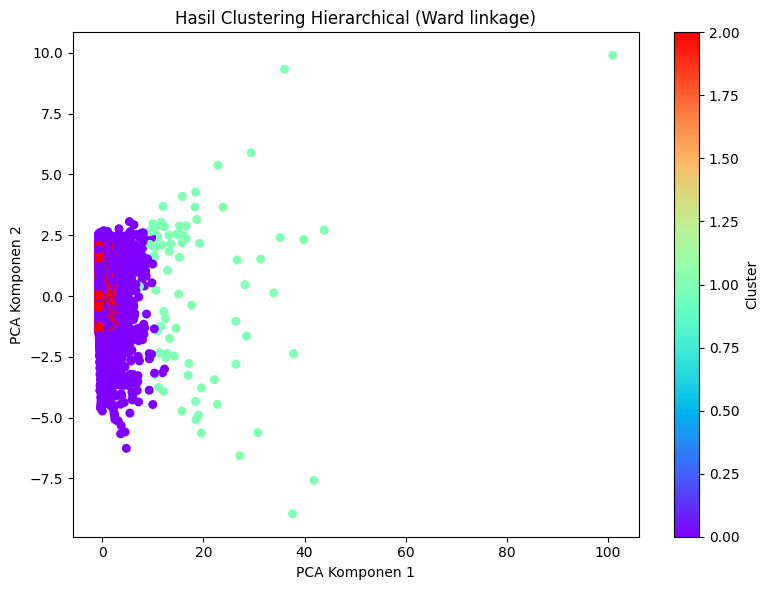

In [64]:
# 4. Visualisasi hasil clustering dengan PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(data_scaled)
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=hc_labels, cmap='rainbow', s=30)
plt.title("Hasil Clustering Hierarchical (Ward linkage)")
plt.xlabel("PCA Komponen 1")
plt.ylabel("PCA Komponen 2")
plt.colorbar(label="Cluster")
plt.tight_layout()
plt.show()

In [ ]:
# DBSCAN clustering
dbscan = DBSCAN(eps=1.5, min_samples=5)  # kamu bisa coba ubah eps & min_samples
db_labels = dbscan.fit_predict(data_scaled)

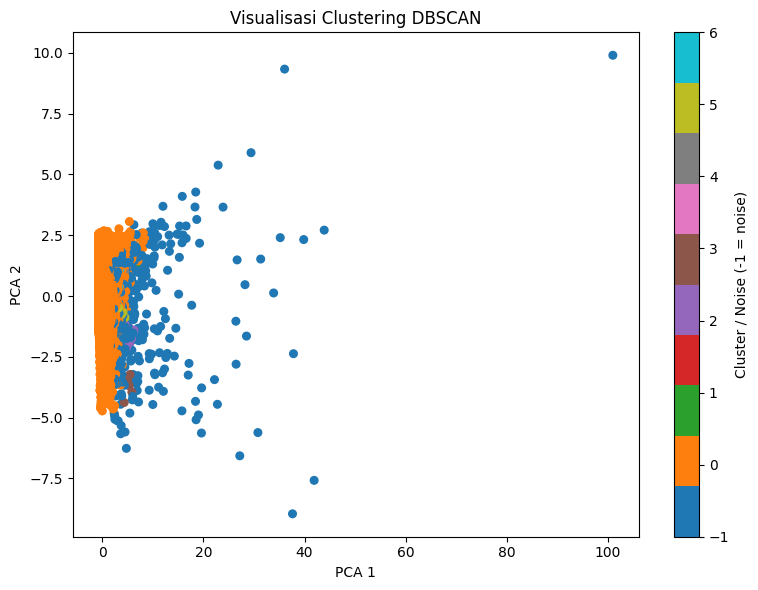

In [ ]:
# Visualisasi hasil DBSCAN
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=db_labels, cmap='tab10', s=30)
plt.title("Visualisasi Clustering DBSCAN")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label="Cluster / Noise (-1 = noise)")
plt.tight_layout()
plt.show()

In [67]:
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

In [68]:
# Menyimpan hasil label dari masing-masing algoritma
kmeans_labels = kmeans.labels_
hierarchical_labels = hc.labels_
dbscan_labels = dbscan.labels_

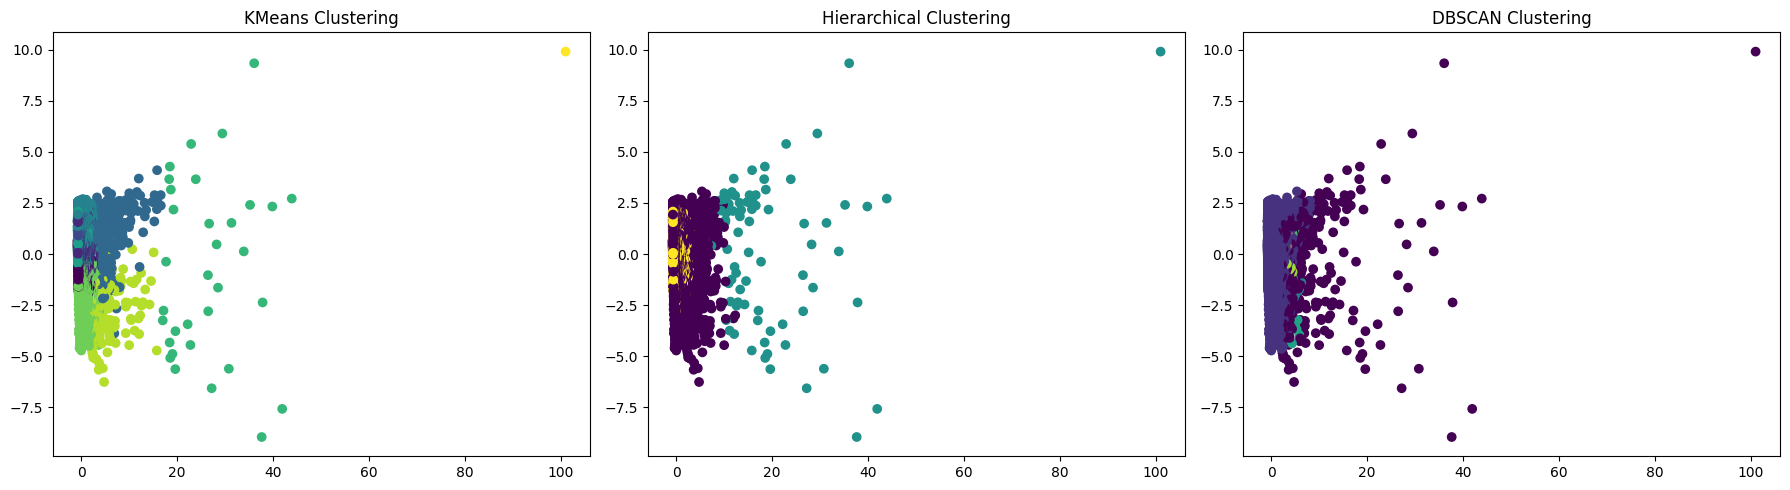

In [69]:
# Visualisasi clustering dengan PCA
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

axs[0].scatter(data_pca[:, 0], data_pca[:, 1], c=kmeans_labels, cmap='viridis')
axs[0].set_title('KMeans Clustering')

axs[1].scatter(data_pca[:, 0], data_pca[:, 1], c=hierarchical_labels, cmap='viridis')
axs[1].set_title('Hierarchical Clustering')

axs[2].scatter(data_pca[:, 0], data_pca[:, 1], c=dbscan_labels, cmap='viridis')
axs[2].set_title('DBSCAN Clustering')

plt.tight_layout()
plt.show()

In [72]:
# Hitung silhouette score
kmeans_silhouette = silhouette_score(data_scaled, kmeans_labels)
hierarchical_silhouette = silhouette_score(data_scaled, hierarchical_labels)
# DBSCAN bisa saja menghasilkan -1 (noise), jadi pastikan jumlah cluster > 1 sebelum hitung silhouette
if len(set(dbscan_labels)) > 1:
    dbscan_silhouette = silhouette_score(data_scaled, dbscan_labels)
else:
    dbscan_silhouette = -1  # Tidak valid

print("Silhouette Score KMeans: ", round(kmeans_silhouette, 3))
print("Silhouette Score Hierarchical: ", round(hierarchical_silhouette, 3))
print("Silhouette Score DBSCAN: ", round(dbscan_silhouette, 3))

Silhouette Score KMeans:  0.205
Silhouette Score Hierarchical:  0.134
Silhouette Score DBSCAN:  0.355
